1- Df elaborado com ajuda de ferramenta IA (Esses dados são informaçõers ficticias sobre transações bancárias e informações economicas sobre clientes e comportamentos financeiros)


2- Escopo, parametros, correlação dos dados, lógica elaboradas por Ana Carolina


3- Colunas estudas e analisadas por Ana Carolina


4- Extração do mês 


5- Visão geral da movimentação


6- Classificação com base na renda


7- Análise %


8- Análise padrão de consumo com c. credito


9- Historico de inadimplencia 

Insights:

A distribuição da frequência de utilização do cartão varia entre as classes, o que pode indicar diferentes padrões de comportamento de gastos.

A análise do histórico de inadimplência mostra como esse fator está distribuído entre as classes.

As variáveis de classificação de clientes são baseadas em critérios específicos, e a definição desses critérios pode ser ajustada para refletir diferentes estratégias de segmentação.

In [24]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from faker import Faker
import seaborn as sns
import matplotlib as plt

# Função para gerar IDs de transação looping
def generate_transaction_id():
    return 'E' + ''.join(np.random.choice(list('0123456789ABCDEF'), size=17)) + 'Y76Y0'

# Função para gerar nomes fictícios de estabelecimentos brasileiros com lib Faker
def generate_brazilian_establishment_name(category):
    #Realizei a escolhe dos parametros dentro
    category_prefixes = {
        'Alimentacao': 'Restaurante',
        'Transporte': 'Posto',
        'Lazer': 'Cinema',
        'Saude': 'Farmacia',
        'Educacao': 'Escola',
        'Moradia': 'Imobiliaria',
        'Compras Online': 'E-commerce',
        'Servicos': 'Assistencia Tecnica',
        'Outros': 'Estabelecimento'
    }

    # Gerar nome fictício do estabelecimento
    return f'{category_prefixes.get(category, "Estabelecimento")} {faker.company_suffix()}'

# Função para categorizar transações
def categorize_transaction(loc, val):
    # Lógica de categorização (substitua pelo seu próprio critério)
    if 'Restaurante' in loc:
        subcategoria = 'Refeicao'
        categoria = 'Alimentacao'
        motivo = 'Alimentacao Fora de Casa'
    elif 'Posto' in loc:
        subcategoria = 'Combustivel'
        categoria = 'Transporte'
        motivo = 'Abastecimento de Veiculo'
    else:
        subcategoria = 'Outros'
        categoria = 'Outros'
        motivo = 'Despesa Diversificada'
    
    return categoria, subcategoria, motivo

# Criando dados fictícios para o DataFrame
np.random.seed(42)
faker = Faker('pt_BR')  # Definindo o idioma para português brasileiro

data = {
    'ID_Transacao': [generate_transaction_id() for _ in range(192000)],
    'Data_Transacao': [datetime(2023, 7, 1) + timedelta(days=np.random.randint(92)) for _ in range(192000)],
    'Valor_Transacao': np.random.uniform(100, 90000, 192000).round(2),
    'Tipo_Transacao': np.concatenate([np.random.choice(['Transferencia', 'Saque', 'PIX'], p=[0.3, 0.2, 0.5], size=64000),
                                      np.random.choice(['Transferencia', 'Saque', 'PIX'], p=[0.6, 0.2, 0.2], size=64000),
                                      np.random.choice(['Transferencia', 'Saque', 'PIX'], p=[0.4, 0.4, 0.2], size=64000)]),
    'Categoria_Gasto': np.random.choice(['Alimentacao', 'Transporte', 'Lazer', 'Saude', 'Educacao', 'Moradia', 'Compras Online', 'Servicos', 'Outros'], size=192000),
    'Local_Transacao': [generate_brazilian_establishment_name(category) for category in np.random.choice(['Alimentacao', 'Transporte', 'Lazer', 'Saude', 'Educacao', 'Moradia', 'Compras Online', 'Servicos', 'Outros'], size=192000)],
    'Metodo_Pagamento': np.random.choice(['Debito', 'Credito', 'Transferencia', 'PIX'], p=[0.2, 0.3, 0.2, 0.3], size=192000),
    'Saldo_Antes': np.random.uniform(100, 50000, 192000).round(2),
    'Saldo_Depois': 0,  # Será preenchido posteriormente
    'Tempo_Transacao': [datetime(2023, 7, 1) + timedelta(hours=np.random.randint(24*92)) for _ in range(192000)],
    'Feriado': np.random.choice([0, 1], size=192000),
    'Dia_Semana': np.random.choice(['Segunda', 'Terca', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo'], size=192000),
    'Volume_Transacoes': 0,  # Será preenchido posteriormente
    'Parcelas': np.random.randint(1, 6, size=192000),
    'Tipo_Conta': np.random.choice(['Corrente', 'Poupanca'], size=192000),
    'Flag_Fraude': np.random.choice([0, 1], size=192000),
    'Pontuacao_Credito': np.random.randint(300, 850, size=192000),
    'Taxa_Juros': np.random.uniform(0, 0.2, 192000),
    'Canal_Transacao': np.random.choice(['Online', 'Caixa Eletronico', 'Agencia'], size=192000),
    'Limite_Credito': np.random.uniform(40000, 80000, 192000).round(2),  # Ajustado o intervalo
    'Historico_Inadimplencia': np.random.choice(['Bom', 'Regular', 'Ruim'], p=[0.7, 0.2, 0.1], size=192000),
    'Score_Gasto': np.random.randint(300, 850, size=192000),
    'Frequencia_Utilizacao_Cartao': np.random.choice(['Alta', 'Moderada', 'Baixa'], p=[0.4, 0.4, 0.2], size=192000),
    'Ciclo_Pagamento': np.random.choice(['Mensal', 'Quinzenal'], size=192000),
    'Comportamento_Pagamento': np.random.choice(['Pontual', 'Atrasado'], p=[0.8, 0.2], size=192000),
    'Participacao_Fidelidade': np.random.choice(['Sim', 'Nao'], p=[0.6, 0.4], size=192000),
}

# Criando o DataFrame
base = pd.DataFrame(data)

# Reduzindo o DataFrame para 64 mil linhas
base = base.sample(n=64000, random_state=42)

# Aplicando a lógica de categorização após o DataFrame ser criado
base[['Categoria_Gasto_Sub', 'Motivo_Transacao', 'Categoria_Gasto']] = base.apply(lambda row: categorize_transaction(row['Local_Transacao'], row['Valor_Transacao']), axis=1, result_type='expand')

# Calculando Saldo_Depois e Volume_Transacoes
base['Saldo_Depois'] = base['Saldo_Antes'] - base['Valor_Transacao']
base['Volume_Transacoes'] = base.groupby('Tipo_Transacao')['Valor_Transacao'].transform('sum')




In [42]:
base.columns.tolist()

['ID_Transacao',
 'Data_Transacao',
 'Valor_Transacao',
 'Tipo_Transacao',
 'Categoria_Gasto',
 'Local_Transacao',
 'Metodo_Pagamento',
 'Saldo_Antes',
 'Saldo_Depois',
 'Tempo_Transacao',
 'Feriado',
 'Dia_Semana',
 'Volume_Transacoes',
 'Parcelas',
 'Tipo_Conta',
 'Flag_Fraude',
 'Pontuacao_Credito',
 'Taxa_Juros',
 'Canal_Transacao',
 'Limite_Credito',
 'Historico_Inadimplencia',
 'Score_Gasto',
 'Frequencia_Utilizacao_Cartao',
 'Ciclo_Pagamento',
 'Comportamento_Pagamento',
 'Participacao_Fidelidade',
 'Categoria_Gasto_Sub',
 'Motivo_Transacao',
 'Mes_Transacao',
 'Renda']

In [27]:
base['Data_Transacao'] = pd.to_datetime(base['Data_Transacao'])
base['Mes_Transacao'] = base['Data_Transacao'].dt.month
base


,ID_Transacao,Data_Transacao,Valor_Transacao,Tipo_Transacao,Categoria_Gasto,Local_Transacao,Metodo_Pagamento,Saldo_Antes,Saldo_Depois,Tempo_Transacao,...,Limite_Credito,Historico_Inadimplencia,Score_Gasto,Frequencia_Utilizacao_Cartao,Ciclo_Pagamento,Comportamento_Pagamento,Participacao_Fidelidade,Categoria_Gasto_Sub,Motivo_Transacao,Mes_Transacao
35422,E5348E83DC8E1419AAY76Y0,2023-09-11,59541.43,PIX,Abastecimento de Veiculo,Posto e Filhos,PIX,47057.24,-12484.19,2023-08-05 11:00:00,...,45133.21,Bom,313,Alta,Mensal,Atrasado,Sim,Transporte,Combustivel,9
38670,E2C51CD434BD1A6667Y76Y0,2023-07-04,32594.50,PIX,Despesa Diversificada,Estabelecimento Ltda.,PIX,23848.60,-8745.90,2023-08-09 13:00:00,...,48502.79,Bom,394,Moderada,Mensal,Atrasado,Sim,Outros,Outros,7
152684,E18AE587A79120B0C6Y76Y0,2023-07-04,40667.55,Saque,Despesa Diversificada,E-commerce - EI,Credito,26874.66,-13792.89,2023-07-03 09:00:00,...,76643.67,Bom,586,Alta,Quinzenal,Pontual,Nao,Outros,Outros,7
13870,E7528AF7F3430F6C4CY76Y0,2023-07-01,10817.79,Transferencia,Alimentacao Fora de Casa,Restaurante S/A,Credito,28450.66,17632.87,2023-07-22 20:00:00,...,47073.89,Bom,513,Moderada,Mensal,Pontual,Nao,Alimentacao,Refeicao,7
136799,E0230C22680F0B239EY76Y0,2023-09-18,81537.56,Saque,Despesa Diversificada,Assistencia Tecnica S.A.,Transferencia,5116.25,-76421.31,2023-09-14 03:00:00,...,45253.83,Regular,433,Baixa,Quinzenal,Pontual,Sim,Outros,Outros,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112125,E50B6C4967A218C036Y76Y0,2023-07-28,86279.98,PIX,Abastecimento de Veiculo,Posto e Filhos,Credito,1180.03,-85099.95,2023-09-18 12:00:00,...,41493.91,Regular,408,Baixa,Quinzenal,Pontual,Sim,Transporte,Combustivel,7
185949,EFB2E34999DEEF50B3Y76Y0,2023-08-23,74351.22,Transferencia,Despesa Diversificada,Imobiliaria - EI,Transferencia,27811.27,-46539.95,2023-07-20 04:00:00,...,58187.58,Bom,300,Alta,Quinzenal,Pontual,Sim,Outros,Outros,8
142756,E2303EA4B09438E0E3Y76Y0,2023-08-29,42506.91,PIX,Despesa Diversificada,Cinema - ME,Transferencia,16812.30,-25694.61,2023-08-12 22:00:00,...,57421.17,Bom,598,Moderada,Mensal,Pontual,Nao,Outros,Outros,8
18446,E2AA3D125374CA516BY76Y0,2023-07-23,70389.11,PIX,Abastecimento de Veiculo,Posto S/A,Credito,16557.98,-53831.13,2023-09-23 21:00:00,...,75044.57,Bom,552,Alta,Mensal,Pontual,Sim,Transporte,Combustivel,7


Entendendo o quantitativo do conjunto de dados no 2 trim do ano

In [105]:
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR')
valores= base['Valor_Transacao'].sum()
soma_valor_transacao_formatado = locale.currency(valores, grouping=True)
print(f'A soma dos valores de todas as transações no segundo Trim. de 2023 se dá em: {soma_valor_transacao_formatado}')

A soma dos valores de todas as transações no segundo Trim. de 2023 se dá em: R$ 2.877.366.411,62


In [106]:
def classificar_cliente(row):
    if row['Renda'] > 6000 and row['Pontuacao_Credito'] >= 700 and row['Volume_Transacoes'] > 50000:
        return 'A'
    elif row['Renda'] > 3000 and row['Pontuacao_Credito'] >= 600 and row['Volume_Transacoes'] > 20000:
        return 'B'
    else:
        return 'C'

base['Classe'] = base.apply(classificar_cliente, axis=1)
percentual_classe = base['Classe'].value_counts(normalize=True) * 100

print("Percentual de Classe A: {:.2f}%".format(percentual_classe['A']))
print("Percentual de Classe B: {:.2f}%".format(percentual_classe['B']))
print("Percentual de Classe C: {:.2f}%".format(percentual_classe['C']))

Percentual de Classe A: 27.47%
Percentual de Classe B: 18.02%
Percentual de Classe C: 54.50%


c:\Users\morei\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\morei\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\morei\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


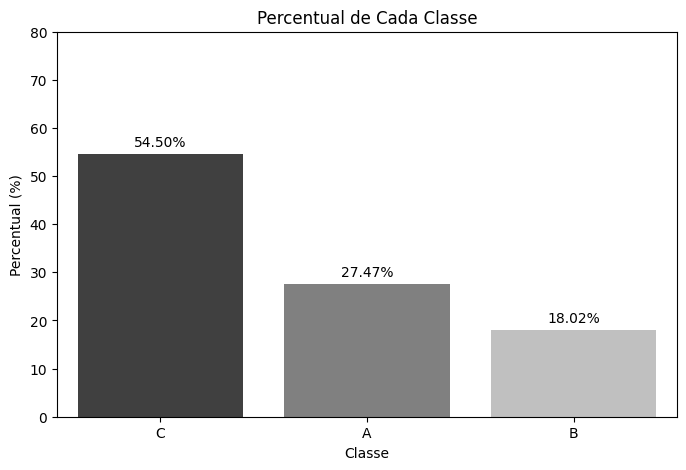

In [103]:

# Calcular percentual do todo
percentual_classe = base['Classe'].value_counts(normalize=True) * 100


plt.figure(figsize=(8, 5))
sns.barplot(x=percentual_classe.index, y=percentual_classe.values, palette='gray',)
plt.title('Percentual de Cada Classe')
plt.xlabel('Classe')
plt.ylabel('Percentual (%)')

for i, percentual in enumerate(percentual_classe.values):
    plt.text(i, percentual + 1, f'{percentual:.2f}%', ha='center', va='bottom')

plt.ylim(0, 80)
plt.show()


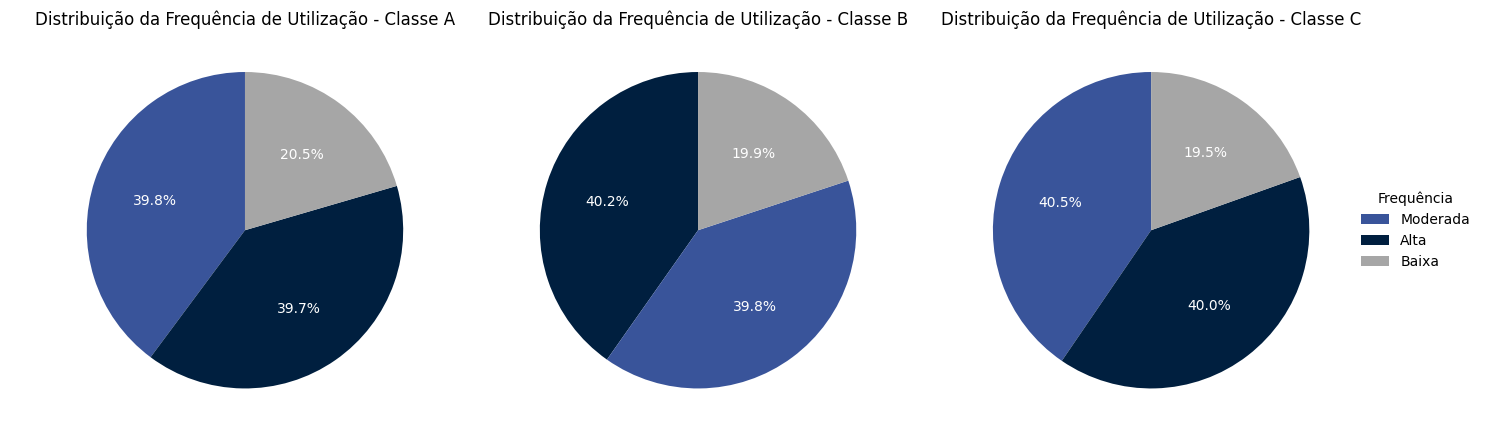

In [90]:

cores_classe = {'A': '#4169e1', 'B': '#d2b48c', 'C': '#808080'}
cores_frequencia = {'Alta': '#001f3f', 'Moderada': '#39549a', 'Baixa': '#a6a6a6'}

# Criar subplots para cada classe
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Iterar sobre as classes
for i, classe in enumerate(['A', 'B', 'C']):
    # Filtrar o DataFrame para a classe atual
    data_classe = base[base['Classe'] == classe]
    
    # Contagem da frequência de utilização do cartão
    frequencia_counts = data_classe['Frequencia_Utilizacao_Cartao'].value_counts()
    
    # Configurar o gráfico de pizza para a classe atual
    axs[i].pie(frequencia_counts, labels=frequencia_counts.index, autopct='%1.1f%%', startangle=90, colors=[cores_frequencia[categoria] for categoria in frequencia_counts.index], textprops={'color': 'white'})
    axs[i].set_title(f'Distribuição da Frequência de Utilização - Classe {classe}')
    
    # Configurar a cor de fundo do subplot de acordo com a classe
    axs[i].set_facecolor(cores_classe[classe])

axs[i].legend(frequencia_counts.index, title="Frequência", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1),
                  labelcolor='black', edgecolor='white', facecolor='white', framealpha=0.7)

plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

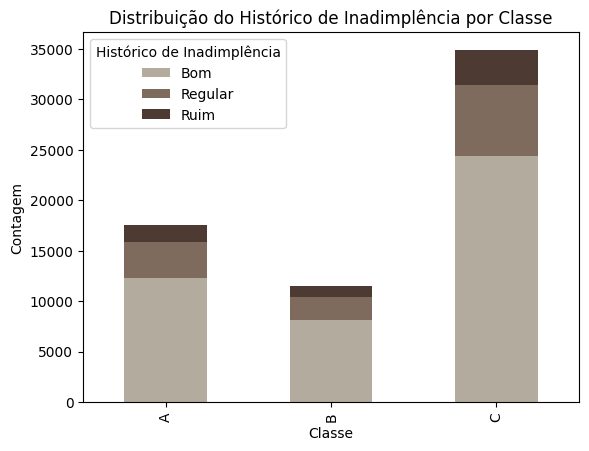

In [99]:
# Criar DataFrame para contar as ocorrências de histórico de inadimplência por classe
historico_df = base.groupby(['Classe', 'Historico_Inadimplencia']).size().unstack(fill_value=0)

# Configurar a paleta de cores marrom em tons pastel
paleta_marrom_pastel = ['#b3ab9e', '#7f6b5d', '#4d3b33']

# Configurar o gráfico de barras empilhadas
plt.figure(figsize=(10, 6))
sns.set_palette(paleta_marrom_pastel)
historico_df.plot(kind='bar', stacked=True)

plt.title('Distribuição do Histórico de Inadimplência por Classe')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.legend(title='Histórico de Inadimplência')
plt.show()

In [ ]:
#Insights:
#A distribuição da frequência de utilização do cartão varia entre as classes, o que pode indicar diferentes padrões de comportamento de gastos.
#A análise do histórico de inadimplência mostra como esse fator está distribuído entre as classes.
#As variáveis de classificação de clientes são baseadas em critérios específicos, e a definição desses critérios pode ser ajustada para refletir diferentes estratégias de segmentação.

In [ ]:
#Geração de Dados Falsos:

#Cria informações falsas sobre transações bancárias, como valores, datas e tipos de gastos, para simular um banco.
#Classificação de Clientes:
#Divide os clientes em grupos (A, B, C) com base em coisas como renda, pontuação de crédito e quanto eles gastam.
#Visualizações Gráficas:
#Mostra gráficos legais para entender melhor os padrões de gastos, como a distribuição de uso do cartão em diferentes classes e o histórico de inadimplência.
#Resultados Importantes:
#Dá uma olhada geral nos resultados, como a soma total dos gastos e o percentual de clientes em cada classe.

In [2]:
import zipfile

with zipfile.ZipFile('analise.zip', 'w') as zipf:
    zipf.write('ipynb.ipynb')
